In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/민지/Downloads/baseball_players.csv')
data.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Text(0.5, 1.0, 'Label')

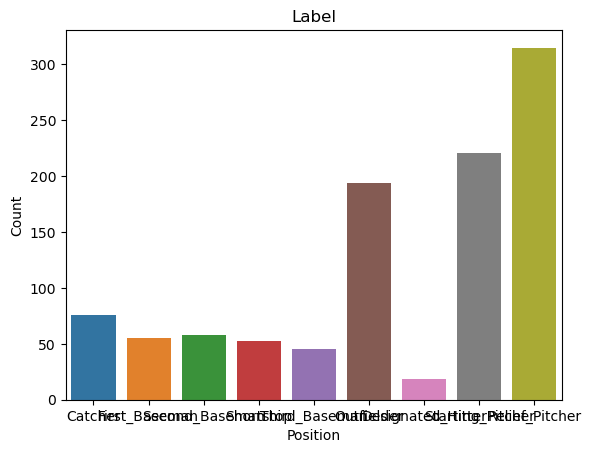

In [2]:
import seaborn as sns

sns.countplot(data = data, x="Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Label")

<AxesSubplot:xlabel='Position', ylabel='Height(inches)'>

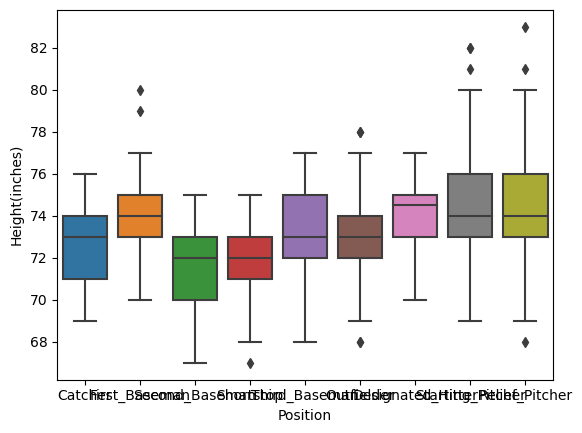

In [3]:
sns.boxplot(x='Position', y='Height(inches)', data=data)

<AxesSubplot:xlabel='Position', ylabel='Weight(pounds)'>

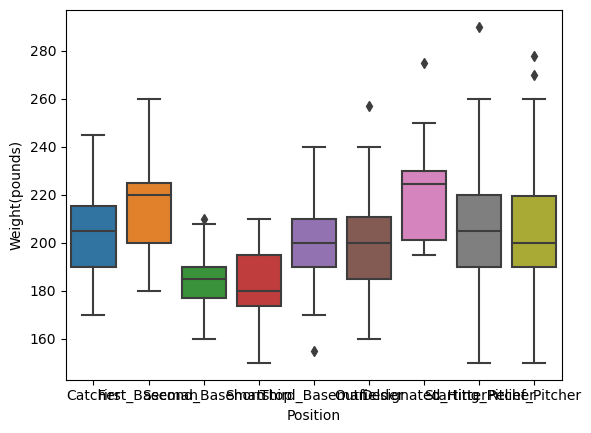

In [4]:
sns.boxplot(x='Position', y='Weight(pounds)', data=data)

<AxesSubplot:xlabel='Position', ylabel='Age'>

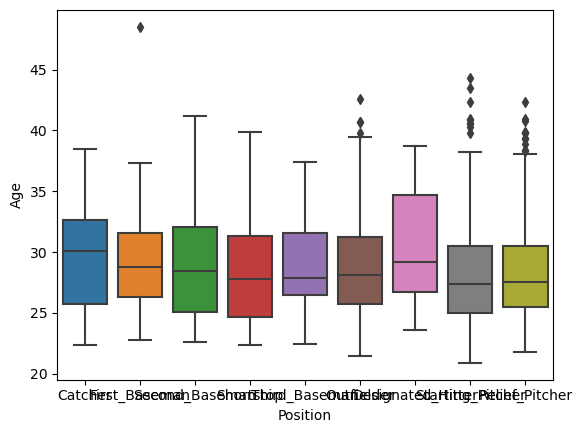

In [5]:
sns.boxplot(x='Position', y='Age', data=data)

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['Position']=le.fit_transform(data['Position'])
data['Name']=le.fit_transform(data['Name'])
data['Team']=le.fit_transform(data['Team'])
data.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,74,180.0,22.99
1,794,3,0,74,215.0,34.69
2,817,3,0,72,210.0,30.78
3,628,3,2,72,210.0,35.43
4,199,3,2,73,188.0,35.71


In [24]:
data.isnull().sum() #결측치 확인

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [25]:
data=data.dropna(axis=0)
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

Text(0.5, 1.0, 'Records per position')

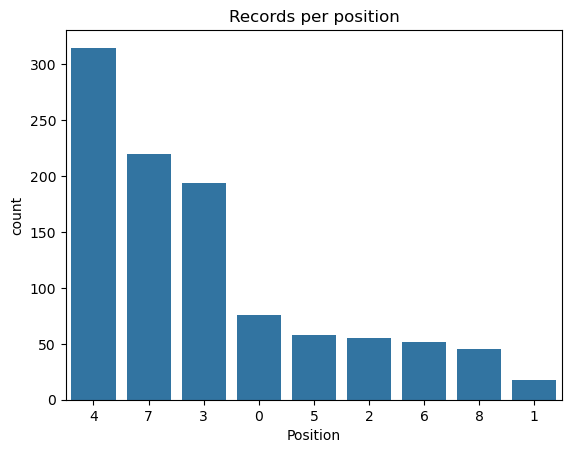

In [26]:
sns.countplot(x='Position', data=data, palette=[sns.color_palette()[0]],
                                               order=data.Position.value_counts().index)
plt.title("Records per position")

In [27]:
#count값을 위처럼 그래프로 나타내지 않고 숫자로 나타내는 코드
bs_outcome = pd.crosstab(index=data["Position"],  # Make a crosstab
                              columns="count")      # Name the count column

bs_outcome

col_0,count
Position,
0,76
1,18
2,55
3,194
4,315
5,58
6,52
7,220
8,45


In [54]:
from sklearn.model_selection import train_test_split

X=data.drop('Position', axis=1)
y=data['Position']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [67]:
X

,Name,Team,Height(inches),Weight(pounds),Age
0,12,3,74,180.0,22.99
1,794,3,74,215.0,34.69
2,817,3,72,210.0,30.78
3,628,3,72,210.0,35.43
4,199,3,73,188.0,35.71
...,...,...,...,...,...
1029,105,25,73,190.0,25.08
1030,997,25,74,180.0,25.73
1031,202,25,75,205.0,25.19
1032,824,25,75,190.0,31.01


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [56]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.29343629343629346
[[ 0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0]]


In [57]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.28185328185328185
[[ 0  0  0  7 13  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1 16  0  0  1  0]
 [ 0  0  0  6 30  0  0  4  0]
 [ 0  0  0  9 59  0  0  8  0]
 [ 0  0  0  6 12  0  0  0  0]
 [ 0  0  0  3  8  0  0  3  0]
 [ 0  0  0  7 39  0  0  8  0]
 [ 0  0  0  3 11  0  0  2  0]]


In [58]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.23166023166023167
[[ 0  0  0  4 16  0  0  1  1]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  1  3 12  1  0  1  0]
 [ 0  0  1  8 26  0  0  5  0]
 [ 0  0  3 23 42  0  2  6  0]
 [ 0  0  0 10  7  0  0  1  0]
 [ 0  0  0  9  5  0  0  0  0]
 [ 0  0  0 11 32  1  2  8  0]
 [ 0  0  1  3  8  0  0  3  1]]


In [59]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.23938223938223938
[[ 2  0  0  4  5  2  3  3  3]
 [ 0  0  0  0  1  0  0  0  0]
 [ 2  0  3  5  1  0  1  6  0]
 [ 4  2  1  9 13  3  1  6  1]
 [ 3  0  2 13 27  7  2 20  2]
 [ 0  0  1  5  3  3  0  5  1]
 [ 1  0  1  4  1  2  1  4  0]
 [ 4  0  2  7 22  0  1 16  2]
 [ 2  0  0  3  4  2  1  3  1]]


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.24324324324324326
[[ 1  0  1  4 13  0  0  1  2]
 [ 0  0  0  0  0  0  0  1  0]
 [ 2  0  0  4  6  1  0  5  0]
 [ 1  0  1  8 15  3  1 11  0]
 [ 4  0  0  7 41  4  1 19  0]
 [ 1  0  0  3  6  3  1  4  0]
 [ 0  0  0  6  3  1  1  3  0]
 [ 1  0  2  7 33  1  0  9  1]
 [ 3  0  0  3  7  2  0  1  0]]


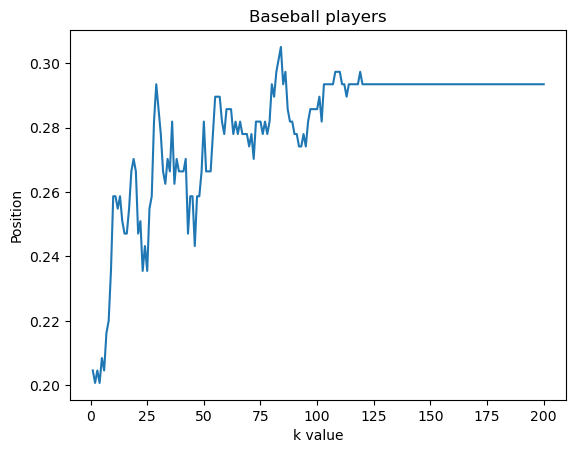

In [69]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_range = range(1, 201)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Position")
plt.title("Baseball players")
plt.show()

In [62]:
x = data.iloc[:, [0, 1, 2, 3, 4, 5]].values

In [63]:
x

array([[ 12.  ,   3.  ,   0.  ,  74.  , 180.  ,  22.99],
       [794.  ,   3.  ,   0.  ,  74.  , 215.  ,  34.69],
       [817.  ,   3.  ,   0.  ,  72.  , 210.  ,  30.78],
       ...,
       [202.  ,  25.  ,   4.  ,  75.  , 205.  ,  25.19],
       [824.  ,  25.  ,   4.  ,  75.  , 190.  ,  31.01],
       [577.  ,  25.  ,   4.  ,  73.  , 195.  ,  27.92]])

In [64]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

In [65]:
from sklearn.cluster import KMeans
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

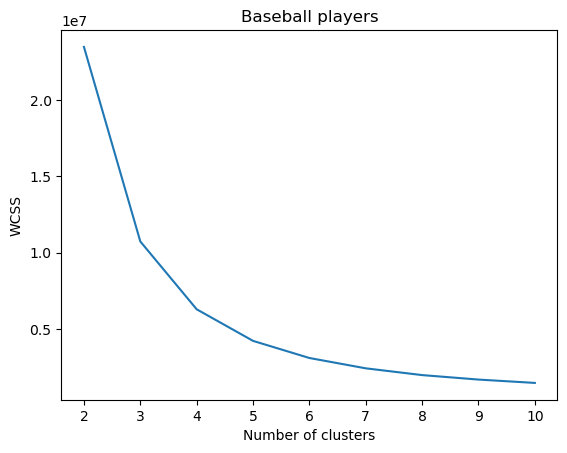

In [66]:
plt.plot(range(2, 11), wcss)
plt.title('Baseball players')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()